# Análise Campanhas de Marketing
Objetivo: Maximizar lucro da próxima campanha com uma seleção otimizada de leads

## Análise Exploratória

Nesse notebook, será mostrada uma análise dos dados dos leads das últimas 6 campanhas.

In [1]:
### Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_processing_functions import *


In [2]:
### Importação dos dados
df = pd.read_csv('ml_project1_data.csv')

In [3]:
### Exploração Rápida dos Dados
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
### Análise Estatísticas das Variáveis da Base
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


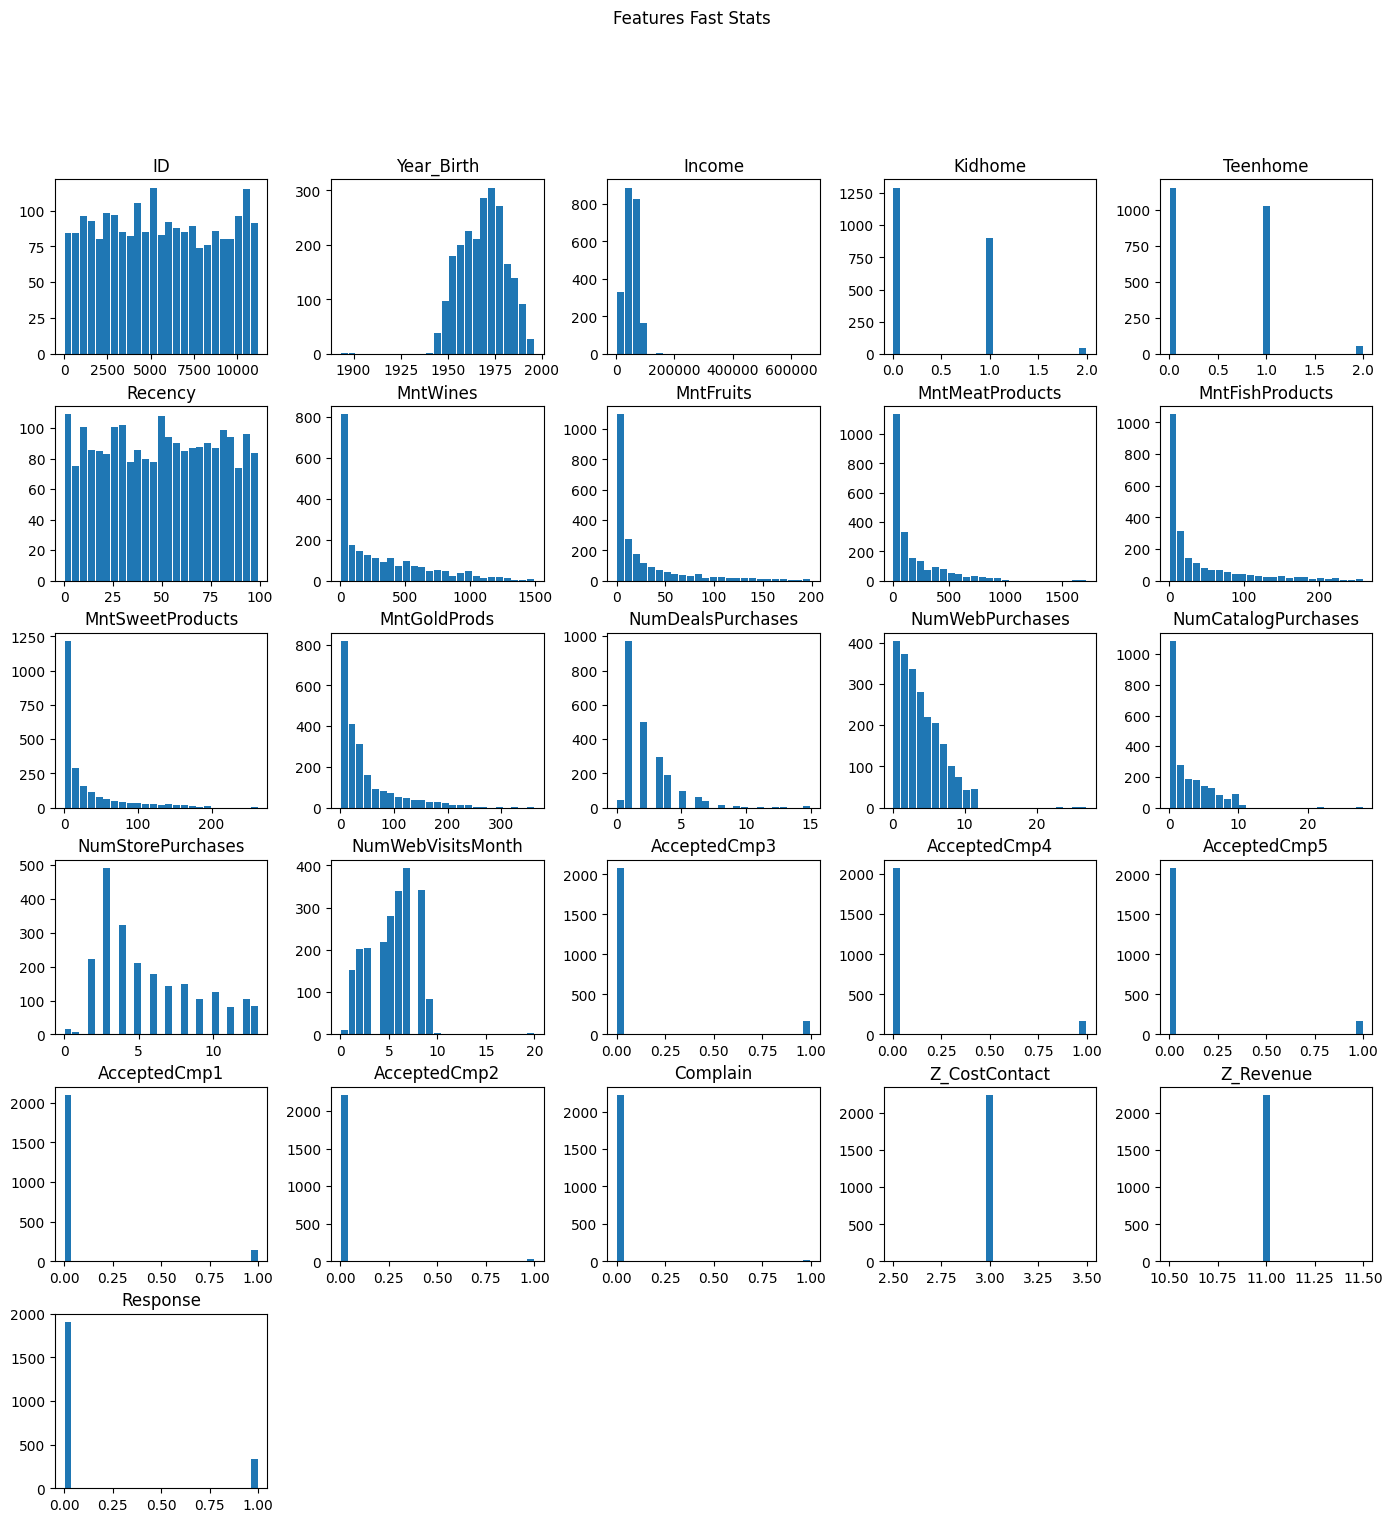

In [5]:
### Análise Rápida das Distribuições dentro da Base

ax = df.hist(bins=25, grid=False, figsize=(17,17), zorder=2, rwidth=0.9)
plt.suptitle("Features Fast Stats")
plt.show()

## Tratamento de Dados

### Valores Ausentes

In [6]:
# Verificação Valores Ausentes

check_missing_values(df)

 ============== Resumo de Valores Nulos ============== 
Coluna  Valores Nulos  Porcentagem (%)
Income             24             1.07

Total de colunas com valores nulos: 1


In [7]:
# Input da mediana na coluna Income
df_treated = df.copy() ## a partir de agora, vamos ter um novo dataframe com os dados já tratados
treat_missing_values_column_median(df_treated, 'Income')


Valores ausentes na coluna 'Income' foram tratados com sucesso usando a mediana (51381.5).


### Outliers

Pela visão geral dos dados, duas colunas possuem outliers: Income e Year Birth. 

In [8]:
# Verificação Year_Birth

check_outliers_column(df, 'Year_Birth', factor=1.5)

 ============== Resumo de Outliers: Year_Birth ============== 
Limite inferior: 1932.00
Limite superior: 2004.00

Número de outliers: 3
Porcentagem de outliers: 0.13%

Resumo estatístico dos outliers:
count       3.000000
mean     1897.333333
std         3.785939
min      1893.000000
25%      1896.000000
50%      1899.000000
75%      1899.500000
max      1900.000000
Name: Year_Birth, dtype: float64

Primeiros 10 valores outliers:
[1900, 1893, 1899]


In [9]:
# Verificação Income

check_outliers_column(df, 'Income', factor=1.5)

 ============== Resumo de Outliers: Income ============== 
Limite inferior: 0.00
Limite superior: 118350.50

Número de outliers: 8
Porcentagem de outliers: 0.36%

Resumo estatístico dos outliers:
count         8.000000
mean     221604.500000
std      179850.404431
min      153924.000000
25%      157090.500000
50%      157488.000000
75%      161201.500000
max      666666.000000
Name: Income, dtype: float64

Primeiros 10 valores outliers:
[157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


In [10]:
# Input da mediana nos valores outliers da coluna Year_Birth
treat_outliers_column_median(df_treated,'Year_Birth')

Outliers na coluna 'Year_Birth' foram tratados com sucesso usando a mediana (1970.0).


In [11]:
# Input da mediana nos valores outliers da coluna Income
treat_outliers_column_median(df_treated,'Income')

Outliers na coluna 'Income' foram tratados com sucesso usando a mediana (51381.5).


### Categorias incorretas - Marital Status

Correção dos inputs 'Absurd','Alone','YOLO'.

In [12]:
df_treated['Marital_Status'] = df_treated['Marital_Status'].replace(['Absurd', 'Alone', 'YOLO'], 'Single')


### Criação de Novas Features

Dt_Customer : extrair ano-mês da data de adesão e extrair apenas ano

In [13]:
df_treated['Dt_Customer'] = pd.to_datetime(df_treated['Dt_Customer'])
df_treated['Dt_Customer_YearMonth'] = df_treated['Dt_Customer'].dt.to_period('M')
df_treated['Dt_Customer_Year'] = df_treated['Dt_Customer'].dt.year


In [14]:
create_frequency_table(df_treated,'Dt_Customer_YearMonth')


Distribuição de Dt_Customer_YearMonth:
                       Contagem Porcentagem
Dt_Customer_YearMonth                      
2012-08                     118       5.27%
2013-10                     117       5.22%
2014-05                     112        5.0%
2014-03                     109       4.87%
2013-01                     107       4.78%
2013-08                     104       4.64%
2013-05                     104       4.64%
2013-03                     102       4.55%
2013-02                     100       4.46%
2013-07                      99       4.42%
2012-09                      99       4.42%
2012-11                      97       4.33%
2012-10                      95       4.24%
2013-09                      94        4.2%
2014-04                      94        4.2%
2013-06                      92       4.11%
2013-12                      92       4.11%
2013-11                      90       4.02%
2014-01                      90       4.02%
2013-04                      88     

In [15]:
create_frequency_table(df_treated,'Dt_Customer_Year')


Distribuição de Dt_Customer_Year:
                  Contagem Porcentagem
Dt_Customer_Year                      
2013                  1189      53.08%
2014                   557      24.87%
2012                   494      22.05%


Recency : nova coluna com buckets de Recency.

In [16]:
bins = [0, 30, 60, 90, df_treated['Recency'].max() + 1]
labels = ['0-30 days', '31-60 days', '61-90 days', '90+ days']
df_treated['Recency_Bucket'] = pd.cut(df_treated['Recency'], bins=bins, labels=labels, include_lowest=True)

In [17]:
create_frequency_table(df_treated,'Recency_Bucket')


Distribuição de Recency_Bucket:
                Contagem Porcentagem
Recency_Bucket                      
0-30 days            724      32.32%
61-90 days           664      29.64%
31-60 days           654       29.2%
90+ days             198       8.84%


Income : nova coluna com buckets de Income

In [18]:
bins = [0, 25000, 50000, 75000, float('inf')]
labels = ['0-25k', '25k-50k', '50k-75k', '75k+']    
df_treated['Income_Bucket'] = pd.cut(df_treated['Income'], bins=bins, labels=labels, include_lowest=True)

In [19]:
create_frequency_table(df_treated,'Income_Bucket')


Distribuição de Income_Bucket:
               Contagem Porcentagem
Income_Bucket                      
50k-75k             829      37.01%
25k-50k             818      36.52%
75k+                351      15.67%
0-25k               242       10.8%


### Visualizações

In [22]:
df_treated.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957.0,1954.0,1965.0,1984.0,1981.0
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,2012-09-04 00:00:00,2014-03-08 00:00:00,2013-08-21 00:00:00,2014-02-10 00:00:00,2014-01-19 00:00:00
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [23]:
columns_by_type = {}

for dtype in df_treated.dtypes.unique():
    
    columns_by_type[str(dtype)] = df_treated.select_dtypes(include=[dtype]).columns.tolist()

In [24]:
columns_by_type

{'int64': ['ID',
  'Kidhome',
  'Teenhome',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp1',
  'AcceptedCmp2',
  'Complain',
  'Z_CostContact',
  'Z_Revenue',
  'Response'],
 'float64': ['Year_Birth', 'Income'],
 'object': ['Education', 'Marital_Status'],
 'datetime64[ns]': ['Dt_Customer'],
 'period[M]': ['Dt_Customer_YearMonth'],
 'int32': ['Dt_Customer_Year'],
 'category': ['Recency_Bucket', 'Income_Bucket']}

In [22]:
columns_by_type['int64']

['ID',
 'Year_Birth',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [14]:
def plot_categorical(df, column):
    plt.figure(figsize=(8, 8))
    
    value_counts = df[column].value_counts()
    
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, order=value_counts.index)
    
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    
    total = len(df)
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        label = f'{int(height)}\n({percentage})'
        ax.text(p.get_x() + p.get_width()/2, height, 
                label, 
                ha='center', va='bottom',
                rotation=0)
    
    plt.tight_layout()
    plt.show()


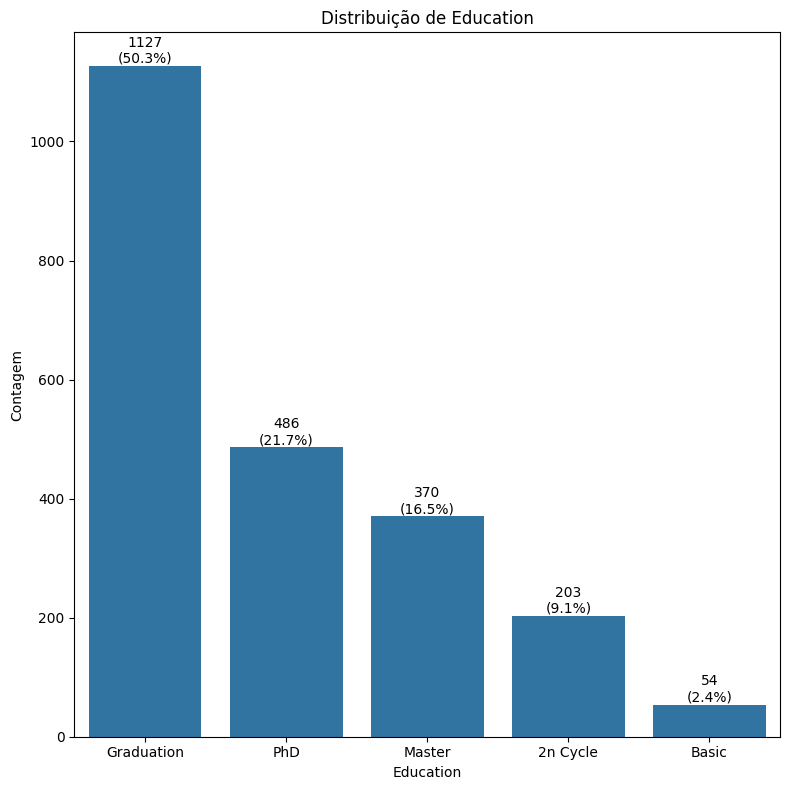

In [15]:
plot_categorical(df_treated,'Education')

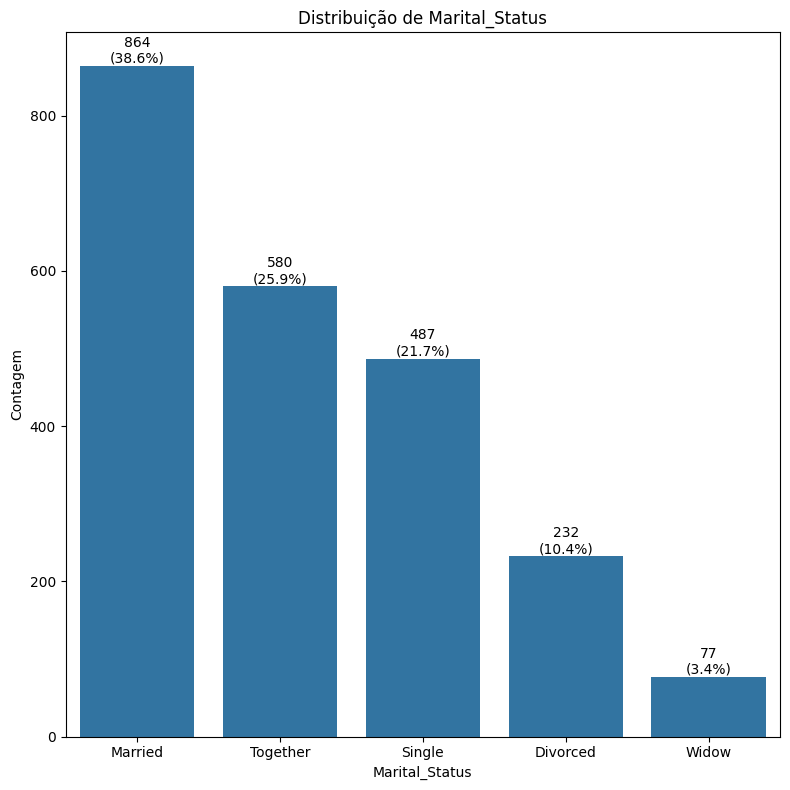

In [16]:
plot_categorical(df_treated,'Marital_Status')

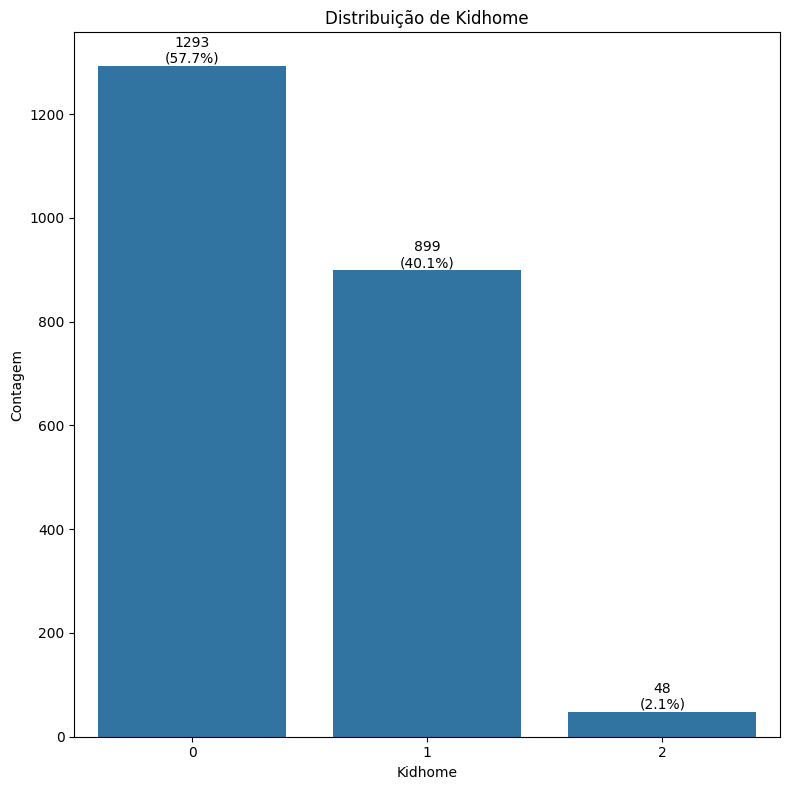

In [17]:
plot_categorical(df_treated,'Kidhome')

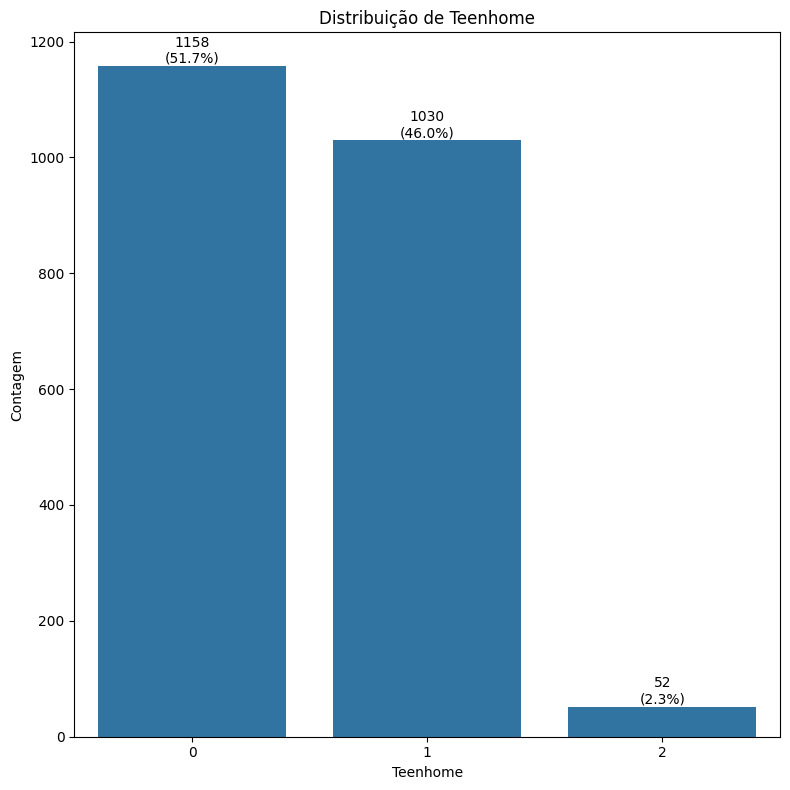

In [18]:
plot_categorical(df_treated,'Teenhome')

In [25]:
def plot_histogram(df, column, bins=30):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=bins, edgecolor='black')
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

# plot_histogram(df_treated, 'Year_Birth')


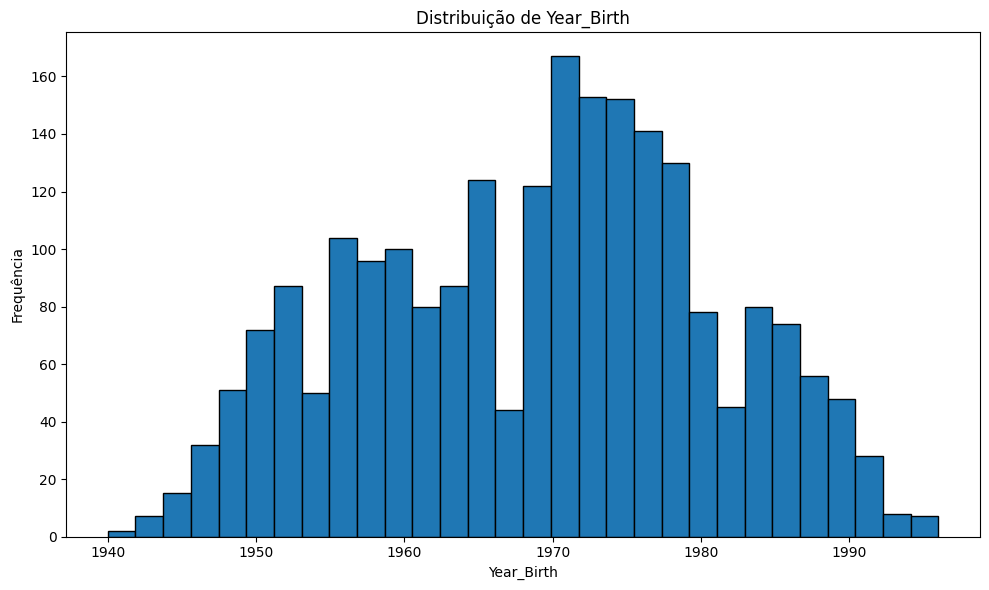

In [26]:
plot_histogram(df_treated, 'Year_Birth')


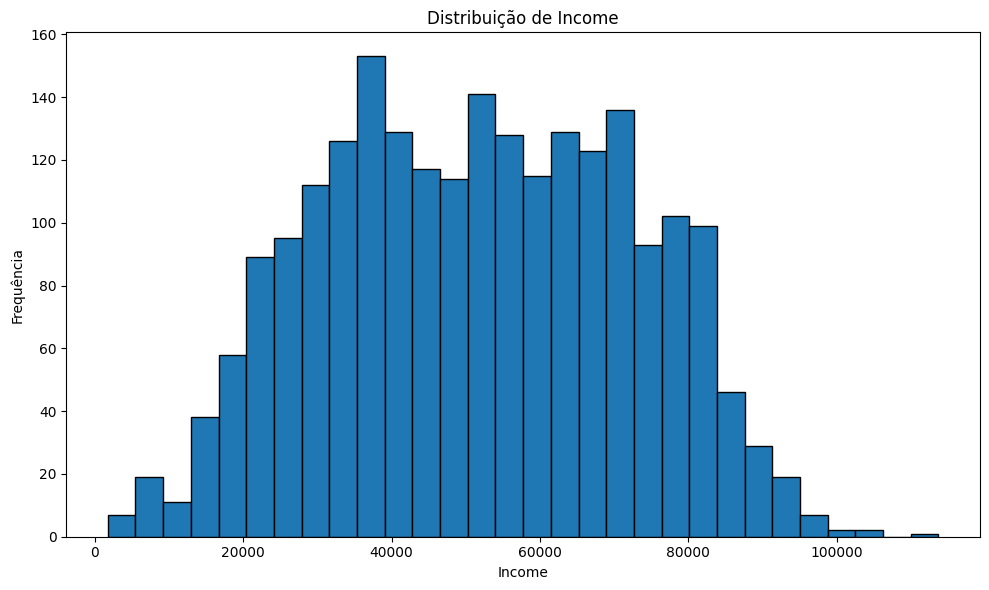

In [27]:
plot_histogram(df_treated, 'Income')

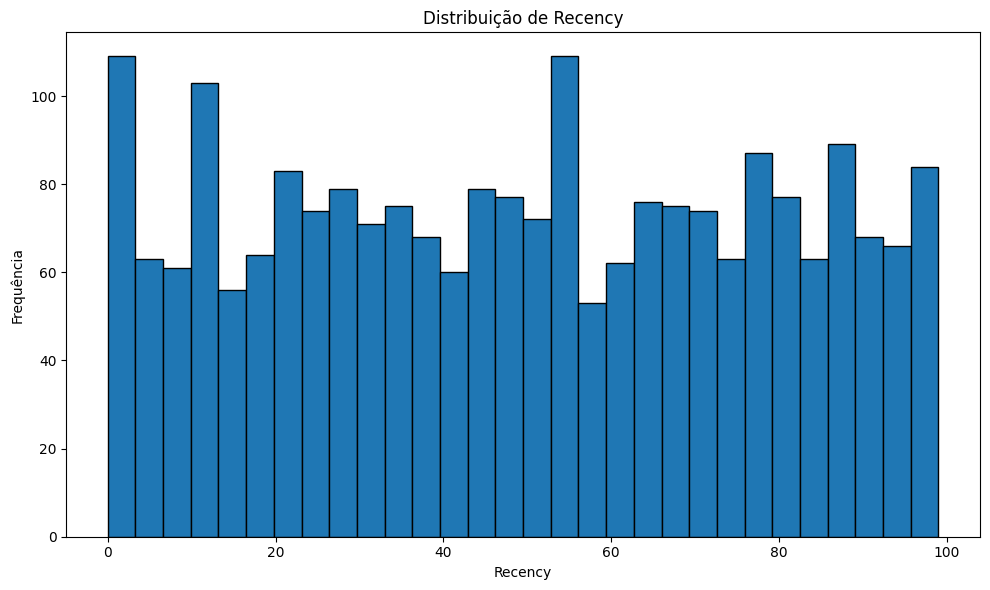

In [29]:
plot_histogram(df_treated, 'Recency')

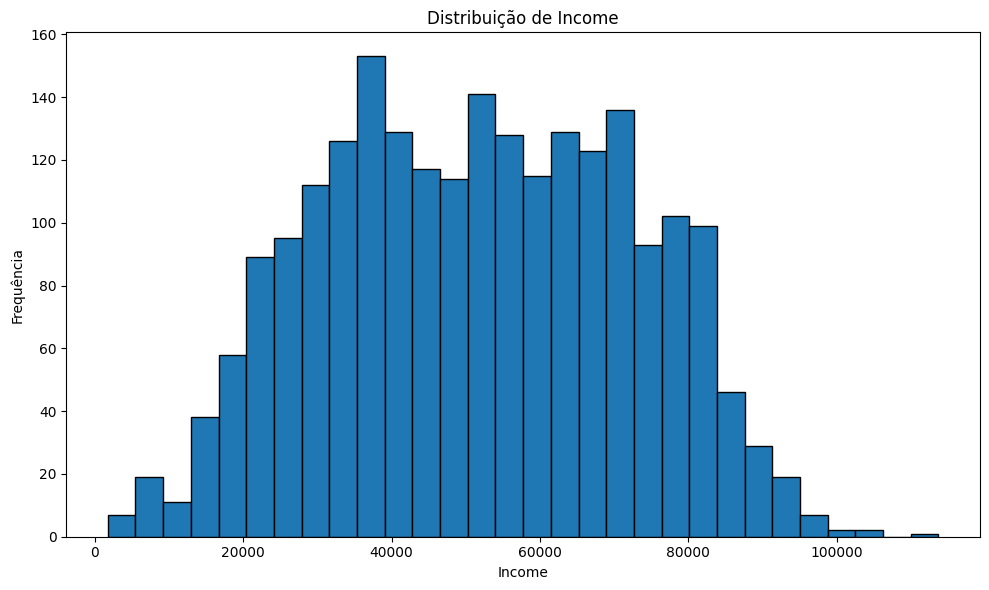

In [44]:
plot_histogram(df_treated, 'Income')

In [57]:
product_sales = df_treated[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=False)
product_sales.index = ['Vinhos', 'Frutas', 'Carnes', 'Peixes', 'Doces', 'Produtos Gold']
print("Top produtos mais vendidos:")
print(product_sales)


Top produtos mais vendidos:
Vinhos           680816
Frutas           373968
Carnes            98609
Peixes            84057
Doces             60621
Produtos Gold     58917
dtype: int64


In [58]:

channel_sales = df_treated[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=False)
channel_sales.index = ['Web', 'Catálogo', 'Loja Física']
print("Top canais de vendas:")
print(channel_sales)


Top canais de vendas:
Web            12970
Catálogo        9150
Loja Física     5963
dtype: int64


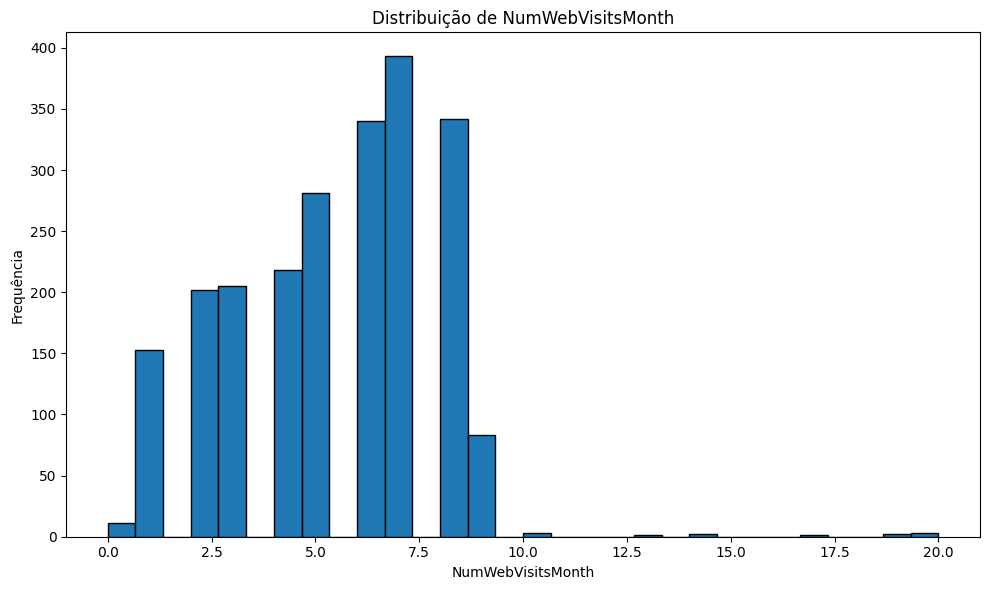

In [59]:
plot_histogram(df_treated, 'NumWebVisitsMonth')

In [60]:
df_treated['Total_AcceptedCmps'] = df_treated['AcceptedCmp1'] + df_treated['AcceptedCmp2'] + df_treated['AcceptedCmp3'] + df_treated['AcceptedCmp4'] + df_treated['AcceptedCmp5'] + df_treated['Response']


In [61]:
create_frequency_table(df_treated,'TotalAcceptedCmps')


Distribuição de TotalAcceptedCmps:
                   Contagem Porcentagem
TotalAcceptedCmps                      
0                      1631      72.81%
1                       370      16.52%
2                       142       6.34%
3                        51       2.28%
4                        36       1.61%
5                        10       0.45%


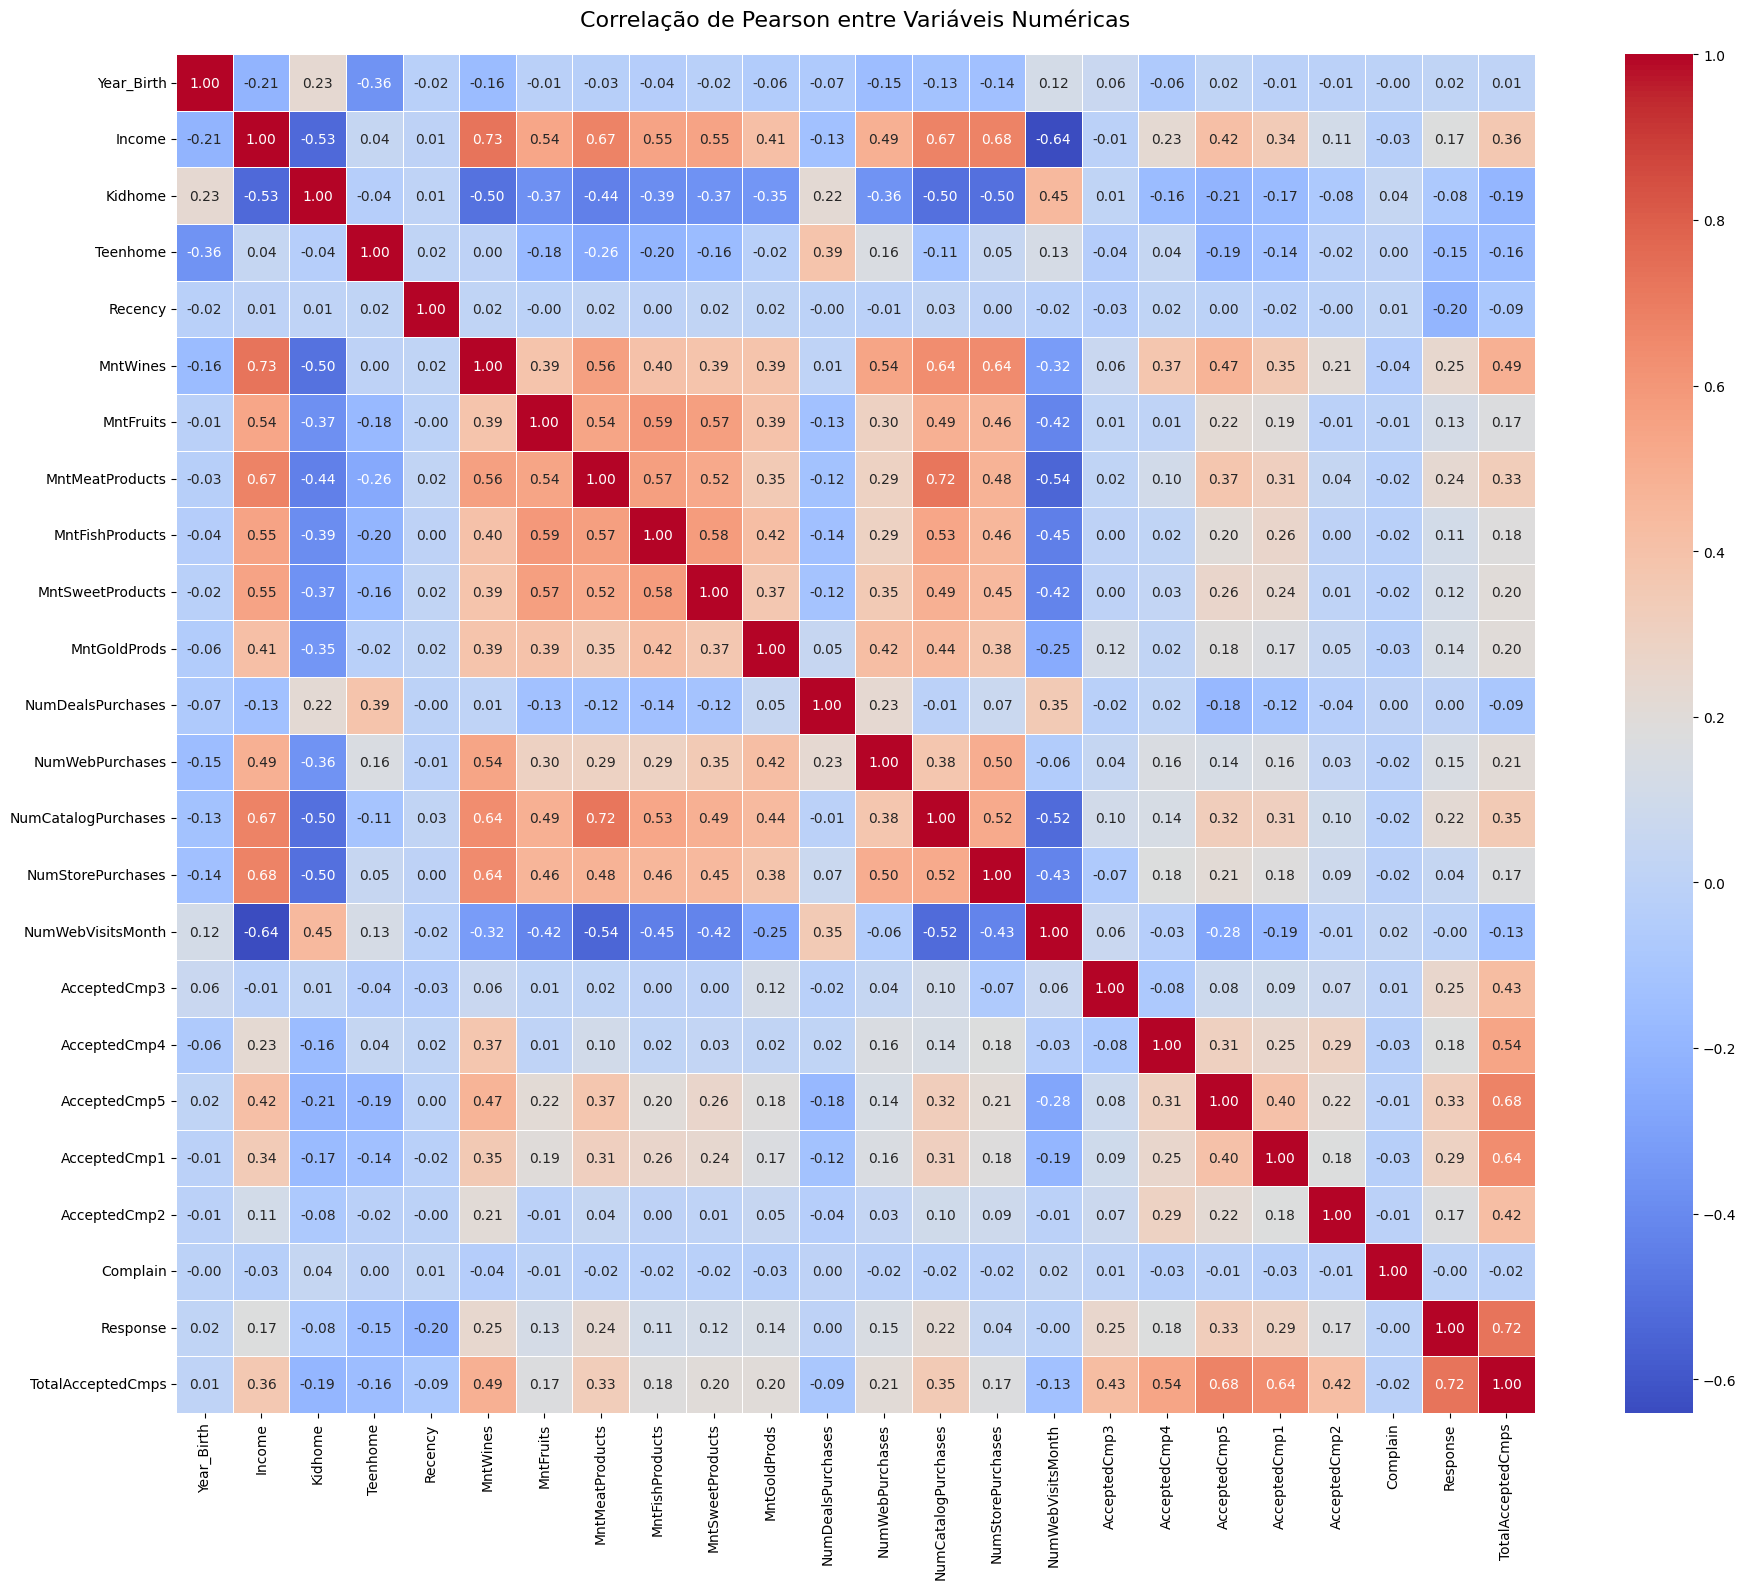

In [64]:
numeric_columns = df_treated.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_treated[numeric_columns]
df_numeric = df_numeric.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

corr_matrix = df_numeric.corr()

plt.figure(figsize=(20, 16))  # Aumentei o tamanho para melhor visualização
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlação de Pearson entre Variáveis Numéricas", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


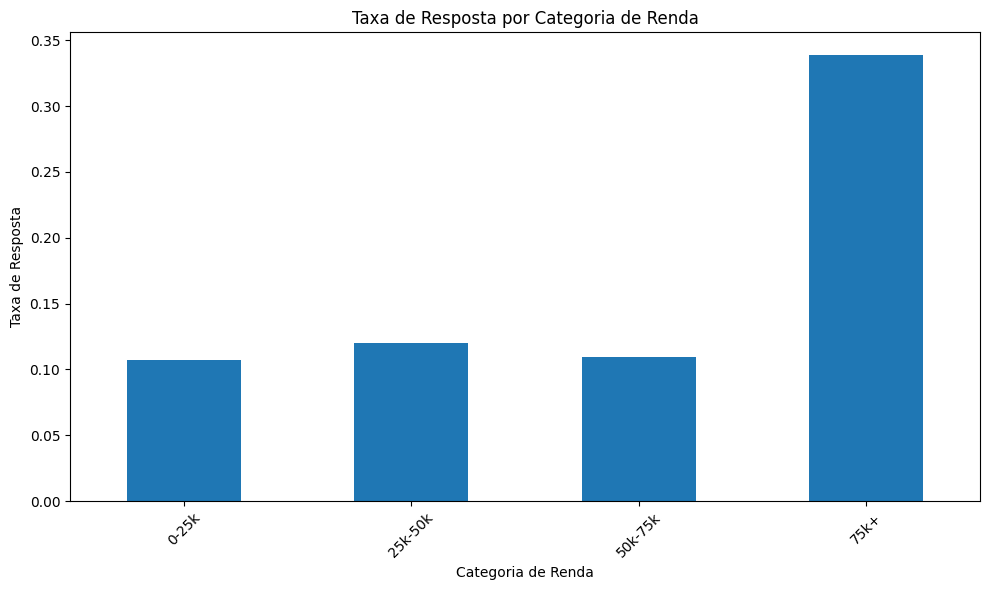

In [67]:
contingency_table = pd.crosstab(df_treated['IncomeBucket'], df_treated['Response'])
response_rates = contingency_table.div(contingency_table.sum(axis=1), axis=0)
plt.figure(figsize=(10, 6))
response_rates[1].plot(kind='bar')
plt.title('Taxa de Resposta por Categoria de Renda')
plt.xlabel('Categoria de Renda')
plt.ylabel('Taxa de Resposta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Valor p: {p_value:.4f}")


Valor p: 0.0000
